<a href="https://colab.research.google.com/github/otsoha/Heart_Disease_ML/blob/main/MLProju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')
data.info()
data.groupby('condition').mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
condition,,,,,,,,,,,,,
0,52.643750,0.556250,1.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,0.412500,0.275000,0.375000
1,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263


<Axes: xlabel='oldpeak', ylabel='condition'>

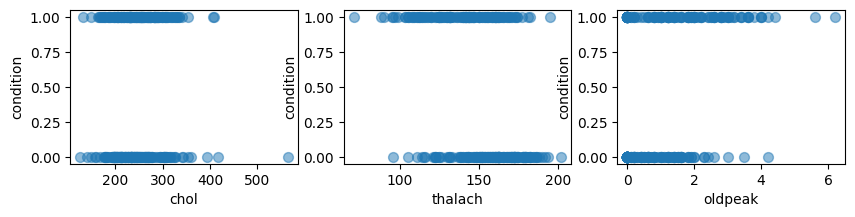

In [ ]:
fig, (p, p2, p3) = plt.subplots(1, 3, figsize=(10, 2))
data.plot.scatter(x='chol', y='condition', s = 50, alpha = 0.5, ax=p)

data.plot.scatter(x='thalach', y='condition', s = 50, alpha = 0.5, ax=p2)

data.plot.scatter(x='oldpeak', y='condition', s = 50, alpha = 0.5, ax=p3)



In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'exang', 'slope','ca', 'thal', 'condition'], axis=1)
y = data['condition']
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


Selected variables with logistic regression: 0.59 accuracy with a standard deviation of 0.04
Selected variables with logistic regression, test accuracy: 0.77, f1: 0.72


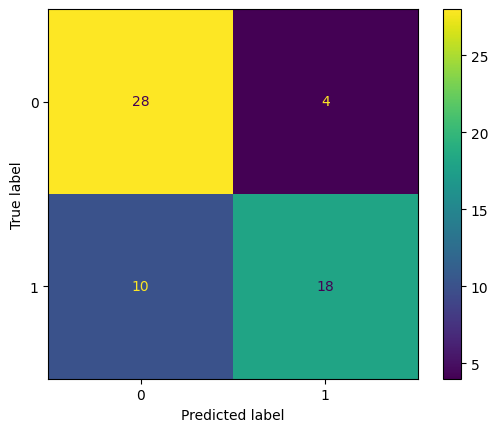

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
clf = LogisticRegression()

#Cross_val_score uses 5-fold validation via KFold if cv = None
scores = cross_val_score(clf, X_train, y_train, cv = None, scoring='accuracy')
print("Selected variables with logistic regression: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
clf.fit(X_train,y_train)
testScore = clf.score(X_test, y_test)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
y_pred = clf.predict(X_test)
F1 = f1_score(y_test, y_pred)

print("Selected variables with logistic regression, test accuracy: %0.2f, f1: %0.2f" % (testScore, F1))

In [ ]:
# testing a decision tree with default hyperparameters
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv = None, scoring='accuracy')
print("Selected variables with default decision tree: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
clf.fit(X_train,y_train)
testScore = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
F1 = f1_score(y_test, y_pred)

print("Selected variables with default decision tree, test accuracy: %0.2f, f1: %0.2f" % (testScore, F1))

Selected variables with default decision tree: 0.57 accuracy with a standard deviation of 0.10
Selected variables with default decision tree, test accuracy: 0.60, f1: 0.59


In [ ]:
from sklearn.model_selection import GridSearchCV


#Tuning the parametres for a decision tree using GridSearch
clf = tree.DecisionTreeClassifier(random_state = 1)

#Create the parameteres to test against
params = {'max_depth': [2, 3, 4, 6, 8], 'min_samples_split': [2, 3, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4]}

# Use cross-validation to tune the hyperparameters
search = GridSearchCV(clf, params, cv=5, scoring='accuracy')
search.fit(X_train, y_train)


print("Best parametres by GridSearch:", search.best_params_)
print("Best score found:", search.best_score_)


Best parametres by GridSearch: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found: 0.674822695035461


Selected variables modeled with a Decision tree: 0.67 accuracy with a standard deviation of 0.05
Selected variables with tuned decision tree, test accuracy: 0.77, f1: 0.68


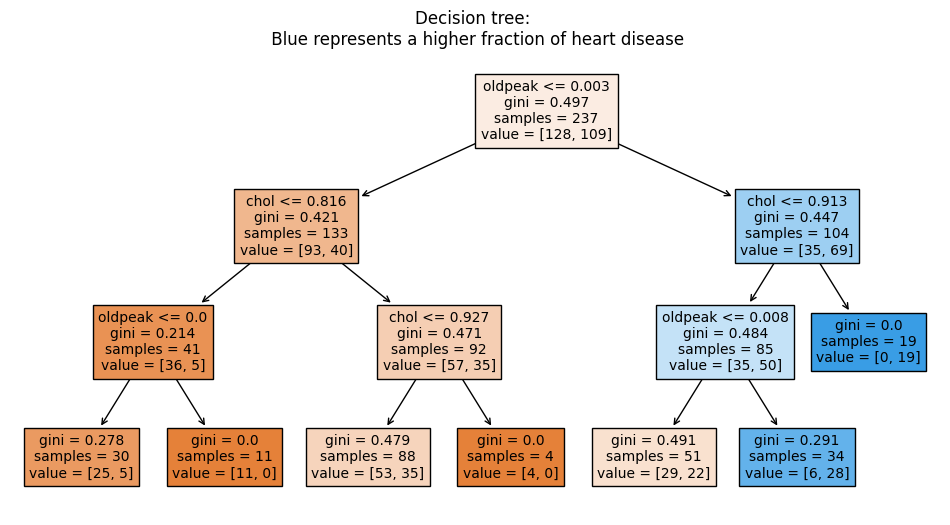

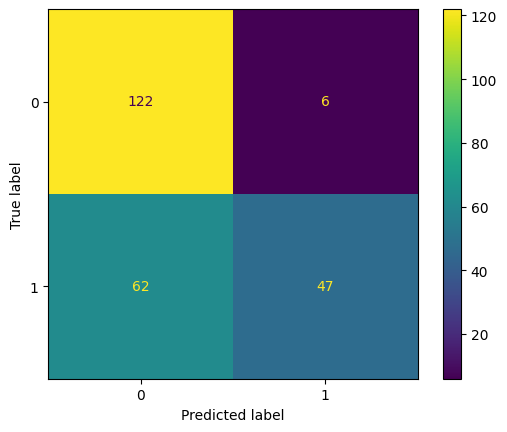

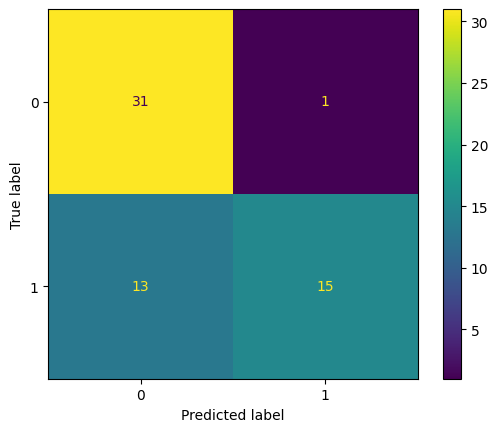

In [ ]:
#Decision tree classifier:
clf = tree.DecisionTreeClassifier(criterion= 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)
scores = cross_val_score(clf, X_train, y_train, cv = None, scoring='accuracy')
print("Selected variables modeled with a Decision tree: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

clf.fit(X_train,y_train)
testScore = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
F1 = f1_score(y_test, y_pred)

print("Selected variables with tuned decision tree, test accuracy: %0.2f, f1: %0.2f" % (testScore, F1))

#Plotting the decision tree:
plt.figure(figsize=(12,6))
tree.plot_tree(clf, filled = True, feature_names=('chol', 'thalach', 'oldpeak'), fontsize=10)
plt.title("Decision tree: \n Blue represents a higher fraction of heart disease")
plt.show()

#Plotting the confusion matrix:
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)